In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-11-28 05:09:20,314: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

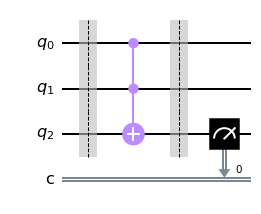

In [12]:
qc=QuantumCircuit(3,1)
qc.barrier()
qc.ccx(0,1,2)
qc.barrier()
qc.measure(2,0)
qc.draw()



In [13]:
q=qc.depth()

In [14]:
q


2

In [4]:
#Initializing qubits using state vectors

In [5]:
from qiskit import QuantumCircuit, assemble, Aer

# Create a quantum circuit with 1 qubit and 1 classical bit.
qc = QuantumCircuit(1, 1)

# Initialize the qubit with a state vector of [1, 0] (a value of 0).
state_vector = [1, 0]
qc.initialize(state_vector, 0)

# Apply a NOT gate on qubit 0.
qc.x(0)

# Measure qubit 0.
qc.measure(0, 0)

# Assemble and run the circuit.
sv_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
job = sv_sim.run(qobj)

# Get the results of the execution.
ket = job.result().get_statevector()

# Print the results.
print(ket)

[0.+0.j 1.+0.j]


/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


In [6]:
#Two menthods to load a state vector

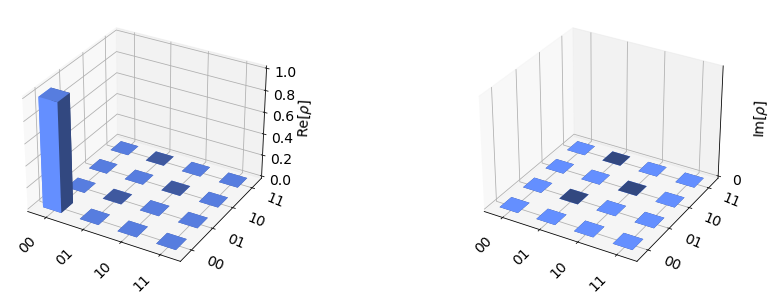

In [10]:
from qiskit import qiskit, execute, QuantumCircuit, BasicAer
from qiskit.quantum_info import Statevector
from qiskit.circuit.random import random_circuit

# Create a random circuit.
qc = random_circuit(2, 4)

sv = Statevector.from_label('00') # 00 corresponds to the number of qubits
ev = sv.evolve(qc)

# We can plot using either method!
plot_state_city(ev)
ev.draw('city')


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


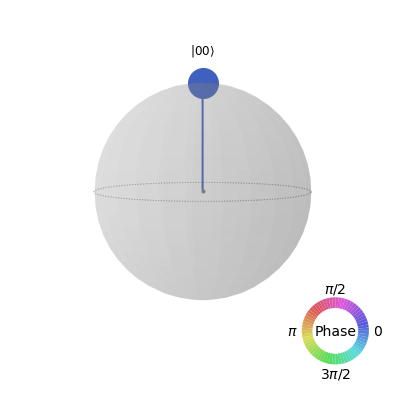

In [11]:
plot_state_qsphere(ev)

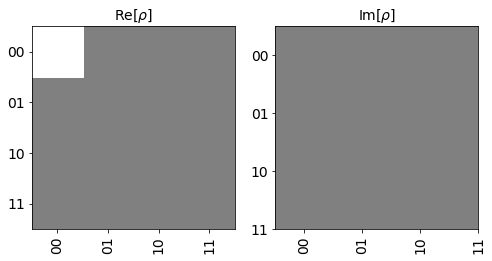

In [13]:
plot_state_hinton(ev)

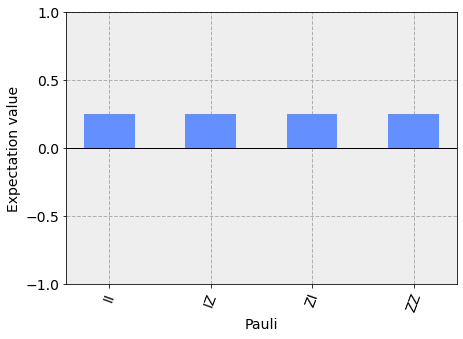

In [14]:
plot_state_paulivec(ev)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


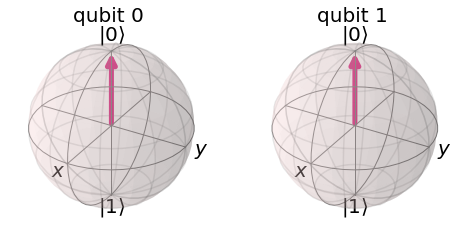

In [15]:
plot_bloch_multivector(ev)

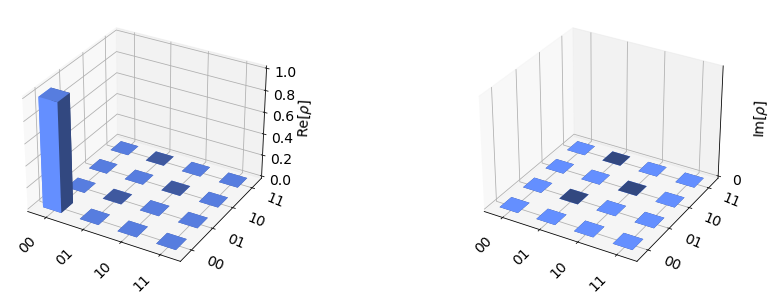

In [16]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
sv = result.get_statevector()

# There is no "draw" method on the simulated statevector!
plot_state_city(sv)

In [17]:
#Depth

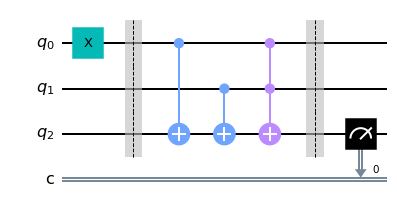

In [19]:

from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 1)

qc.x(0)
qc.barrier()
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 2)
qc.barrier()

qc.measure(2, 0)
qc.draw()
#print(qc.depth())

In [20]:
print(qc.depth())


5


In [21]:
qc = QuantumCircuit(2, 2)
qc.h([0,1])
qc.x([1])
qc.draw(output='mpl', filename='example.png')
print(qc)

     ┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘
c: 2/══════════
               


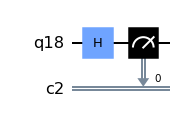

In [24]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('mpl')
#circuit_drawer(qc, output='mpl', style={'backgroundcolor': '#EEEEEE'})

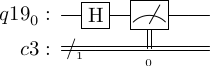

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('latex')
#circuit_drawer(qc, output='latex')

In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('latex_source')
#circuit_drawer(qc, output='mpl', style={'backgroundcolor': '#EEEEEE'})

'\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q20}_{0} :  } & \\lstick{ {q20}_{0} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{c4:} & \\lstick{c4:} & \\lstick{/_{_{1}}} \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-1] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'

In [27]:
#Ploting a Bloch Sphere

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


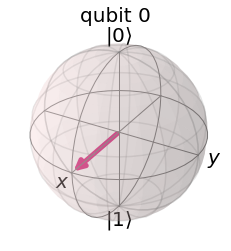

In [30]:
from qiskit import QuantumCircuit, qiskit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1, 1)
qc.h(0)

simulator = Aer.get_backend('statevector_simulator')
job = qiskit.execute(qc, simulator)
result = job.result()
output_state = result.get_statevector(qc)
plot_bloch_multivector(output_state)
#figure = plot_bloch_multivector(output_state)
#figure.savefig('{}/sphere.png'.format(self.image_path))

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


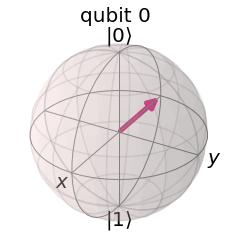

In [33]:
from qiskit import QuantumCircuit, qiskit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1, 1)
qc.h(0)
#qc.x(0)
#qc.y(0)
qc.z(0)
simulator = Aer.get_backend('statevector_simulator')
job = qiskit.execute(qc, simulator)
result = job.result()
output_state = result.get_statevector(qc)
plot_bloch_multivector(output_state)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


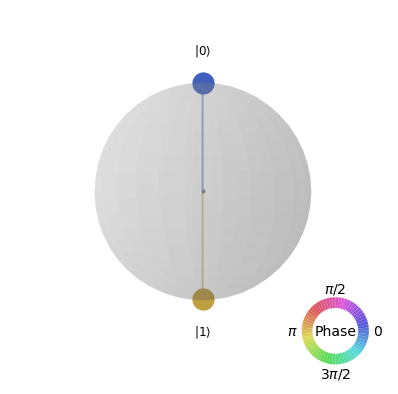

In [34]:
plot_state_qsphere(output_state)

Traceback (most recent call last):
  File "/tmp/ipykernel_77/1922105661.py", line 1, in <module>
    plot_histogram(output_state)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/visualization/counts_visualization.py", line 148, in plot_histogram
    labels = list(sorted(functools.reduce(lambda x, y: x.union(y.keys()), data, set())))
  File "/opt/conda/lib/python3.8/site-packages/qiskit/visualization/counts_visualization.py", line 148, in <lambda>
    labels = list(sorted(functools.reduce(lambda x, y: x.union(y.keys()), data, set())))
AttributeError: 'numpy.complex128' object has no attribute 'keys'

Use %tb to get the full traceback.


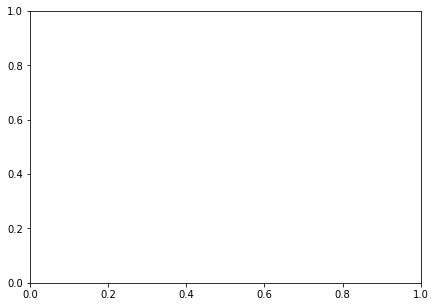

In [37]:
plot_histogram(output_state)

In [38]:
#Initializing a Qubit in superposition

In [42]:
from math import sqrt
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1, 1)
state_vector = [1/sqrt(2), 1j/sqrt(2)] # [0.70710678118, 0.70710678118]
qc.initialize(state_vector, 0)
qc.measure(0, 0)

job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))
figure = plot_histogram(job.result().get_counts())
print(job.result().get_counts())

{'0': 516, '1': 508}


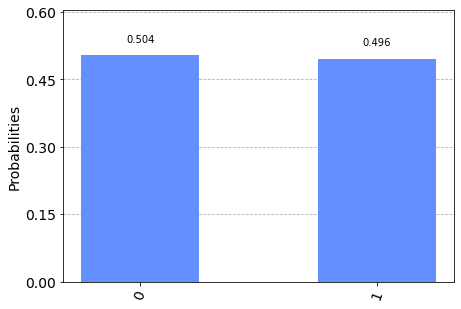

In [43]:
plot_histogram(job.result().get_counts())

[0.5773502691896257, 0.816496580927726]
{'1': 680, '0': 344}


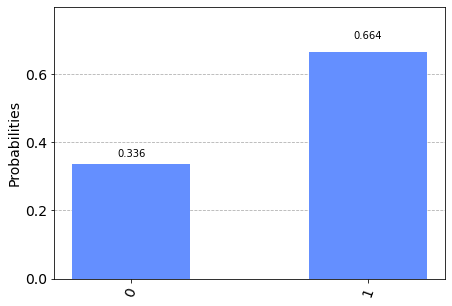

In [46]:
qc = QuantumCircuit(1, 1)
prob = 1/3
value = 1 - prob
state_vector = [sqrt(1-value), sqrt(value)]
print(state_vector)
qc.initialize(state_vector, 0)
qc.measure(0, 0)

shots = 1024
job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'), shots=shots)
print(job.result().get_counts())
plot_histogram(job.result().get_counts())
#figure = plot_histogram(job.result().get_counts())

In [47]:
# Verify the probability of a 1 is 2/3.
target = 2/3
threshold = 0.03
count = job.result().get_counts()['1']
diff = abs(target - count/shots)
print('{} < {} = {}'.format(diff, threshold, diff < threshold))

0.0026041666666666297 < 0.03 = True


In [48]:
#Collapsing a superposition

In [53]:
from math import sqrt

qc = QuantumCircuit(1)
state_vector = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(state_vector, 0)
qc.measure_all()

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(str(state))

[0.+0.j 1.+0.j]


In [54]:
#Entanglement

In [55]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))
print(job.result().get_counts())

{'00': 535, '11': 489}


In [56]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

simulator = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = simulator.run(qobj).result()
output_state = result.get_statevector(qc)
print(output_state)
#figure = plot_histogram(result.get_counts())


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


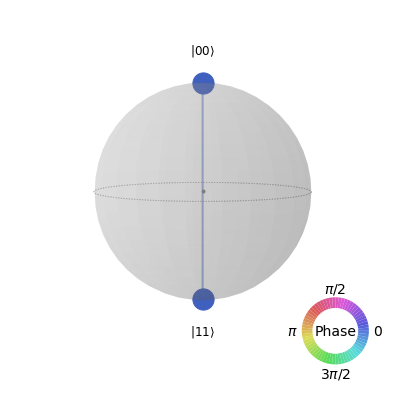

In [59]:
plot_state_qsphere(output_state)

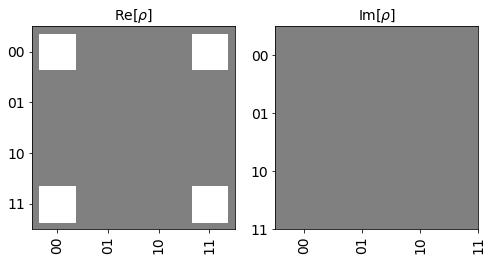

In [60]:
plot_state_hinton(output_state)

In [62]:
#Creating a Bell State in [01, 10]

In [63]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))
print(job.result().get_counts())

{'10': 484, '01': 540}


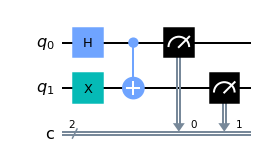

In [64]:
qc.draw()

In [65]:
qc.depth()

3

In [66]:
qc.size()

5

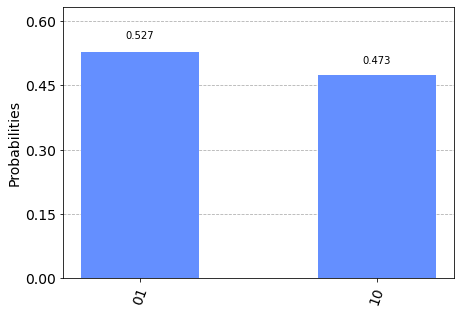

In [69]:
plot_histogram(job.result().get_counts())

In [67]:
#Plotting all Bell states

In [71]:
def four_bell_states():
    """
    Create all 4 Bell states.
    https://quantumcomputing.stackexchange.com/a/2260
    """

    # [00, 11] positive
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    execute_bell(qc, '00-11')

    # [01, 10] positive
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.x(1)
    execute_bell(qc, '01-10')

    # [00, 11] negative
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.z(0)
    execute_bell(qc, '11-00')

    # [01, 10] negative
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.z(0)
    qc.x(1)
    execute_bell(qc, '10-01')

def execute_bell(qc, name):
    simulator = Aer.get_backend('statevector_simulator')
    qobj = assemble(qc)
    result = simulator.run(qobj).result()
    output_state = result.get_statevector(qc)
    print(output_state)
    figure = plot_histogram(result.get_counts())
    figure.savefig('bellstate-{}.png'.format(name))

In [72]:
#Swap Gate

In [73]:
def swap(b, a):
    """
    A quantum circuit that swaps the input bits.
    01 => 10
    """
    swap = QuantumCircuit(2, 2)

    if a:
        swap.x(0)
    if b:
        swap.x(1)

    swap.cx(0, 1)
    swap.cx(1, 0)
    swap.cx(0, 1)
    swap.measure_all()

    job = qiskit.execute(swap, qiskit.BasicAer.get_backend('qasm_simulator'))
    return job.result().get_counts()

In [74]:
def swap_test(b, a):
    # Set our input bits to be swapped.
    input = [b, a]
    # Create a string version '10'.
    input_str = '{}{}'.format(input[0], input[1])
    # Swap the bits.
    output = swap(input[0], input[1])
    # Create a string version of the output '01'.
    output_str = list(output.keys())[0].split(' ')[0]
    # Verify the output.
    print('{} => {} ? {}'.format(input_str, output_str, input_str[::-1] == output_str))

swap_test(0, 0)
swap_test(1, 0)
swap_test(0, 1)
swap_test(1, 1)

00 => 00 ? True
10 => 01 ? True
01 => 10 ? True
11 => 11 ? True


In [77]:
def swap(self, b, a):
    """
    Swap 2 qubits values.
    """

    swap = QuantumCircuit(4)

    if a:
        swap.x([0, 2])
    if b:
        swap.x([1, 3])

    swap.cx(0, 1)
    swap.cx(1, 0)
    swap.cx(0, 1)
    swap.measure_all()
    swap.draw()
    simulator = Aer.get_backend('qasm_simulator')
    job = qiskit.execute(swap, simulator)
    print(job.result().get_counts())

    

In [78]:
# Swap the qubits, right-most with left-most.
swap.cx(0, 5)
swap.cx(5, 0)
swap.cx(0, 5)

swap.cx(1, 4)
swap.cx(4, 1)
swap.cx(1, 4)

swap.cx(2, 3)
swap.cx(3, 2)
swap.cx(2, 3)

Traceback (most recent call last):
  File "/tmp/ipykernel_77/2291024961.py", line 2, in <module>
    swap.cx(0, 5)
AttributeError: 'function' object has no attribute 'cx'

Use %tb to get the full traceback.


In [79]:
def swap(self, bits):
    """
    Swap n qubit values (right-most with left-most).
    100000 => 000001
    111000 => 000111
    100010 => 010001
    """
    n = len(bits)
    swap = QuantumCircuit(n)

    # Initialize the qubits, preserving the input bits.
    for i in range(n):
        if bits[n - i - 1]:
            swap.x([i])

    # Set the left index to the first bit and the right index to the last bit, swap accordingly.
    i = 0
    j = n
    while i < j:
        j = n - i - 1
        swap.cx(i, j)
        swap.cx(j, i)
        swap.cx(i, j)
        i = i + 1

    swap.measure_all()

    simulator = Aer.get_backend('qasm_simulator')
    job = qiskit.execute(swap, simulator)
    print(job.result().get_counts())

In [82]:
swap([1,0,0,0,0],5)

Traceback (most recent call last):
  File "/tmp/ipykernel_77/619797110.py", line 1, in <module>
    swap([1,0,0,0,0],5)
  File "/tmp/ipykernel_77/3049574262.py", line 8, in swap
    n = len(bits)
TypeError: object of type 'int' has no len()

Use %tb to get the full traceback.


In [83]:
#Creating a GHZ circuit

In [84]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()

job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'), shots=1000)
print(job.result().get_counts())

{'111': 493, '000': 507}


In [85]:
qc = QuantumCircuit(1)
qc.x(0)

sv_sim = Aer.get_backend('unitary_simulator')
job = qiskit.execute(qc, sv_sim)
output_vector = job.result().get_unitary(qc, decimals=3)
print(output_vector)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [86]:
qc = QuantumCircuit(2)
qc.x(0)

sv_sim = Aer.get_backend('unitary_simulator')
job = qiskit.execute(qc, sv_sim)
output_vector = job.result().get_unitary(qc, decimals=3)
print(output_vector)

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [90]:
qc = QuantumCircuit(2)
state_vector = [1/sqrt(2), 0, 0, 1/sqrt(2)]
qc.initialize(state_vector, [0, 1])

sv_sim = Aer.get_backend('unitary_simulator')
job = qiskit.execute(qc, sv_sim)
output_vector = job.result().get_unitary(qc, decimals=3)
print(output_vector)


#figure = plot_state_city(output_vector, color=['pink', 'green'])
#print(figure)
#figure.savefig('{}/unitary-plot.png'.format(self.image_path))

[[ 0.707+0.j  0.   +0.j -0.707+0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j -0.707+0.j]
 [ 0.   +0.j -0.707+0.j  0.   +0.j -0.707+0.j]
 [ 0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]]


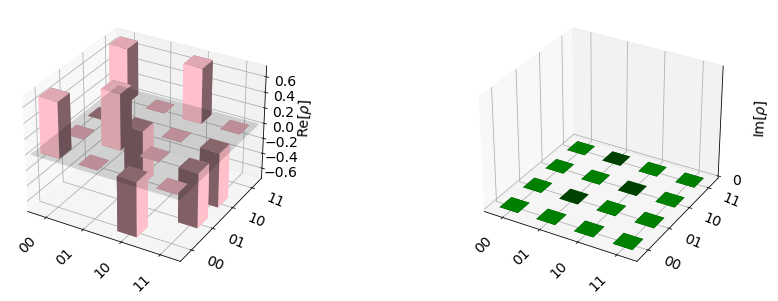

In [91]:
plot_state_city(output_vector, color=['pink', 'green'])

In [92]:
#Reverse a CNOT gate by using phase kickback

In [93]:
qc = QuantumCircuit(2)

# Place both qubits in superposition.
qc.h([0, 1])

# Connect a CNOT gate between the qubits q0 and q1 as we normally would.
qc.cx(0, 1)

# Initialize phase kickback by enclosing the CNOT inside another Hadamard gate.
qc.h([0, 1])

qc.draw(output='mpl', filename='{}/{}.png'.format(self.image_path, self.get_filename()))

# Run the circuit.
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
output_state = sim.run(qobj).result().get_unitary()
a = array_to_latex(output_state, source=True)
print(a)

# Verify the phase kickback CNOT is the same as a CNOT connecting the qubits in reverse order.
qc = QuantumCircuit(2)
qc.cx(1, 0)
qc.save_unitary()
qobj = assemble(qc)
output_state = sim.run(qobj).result().get_unitary()
b = array_to_latex(output_state, source=True)
print(b)

print('Verifying phase kickback CNOT == reverse CNOT: {}'.format(a == b))

Traceback (most recent call last):
  File "/tmp/ipykernel_77/3901924629.py", line 12, in <module>
    qc.draw(output='mpl', filename='{}/{}.png'.format(self.image_path, self.get_filename()))
NameError: name 'self' is not defined

Use %tb to get the full traceback.


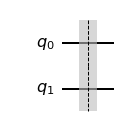

In [96]:
qc = QuantumCircuit(2)
qc.barrier() # Barrier all qubits.
qc.draw()



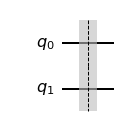

In [97]:
qc = QuantumCircuit(2)
qc.barrier([0, 1]) # Barrier both qubits.
qc.draw()



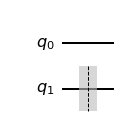

In [98]:
qc = QuantumCircuit(2)
qc.barrier(1) # Barrier the second qubit.
qc.draw()

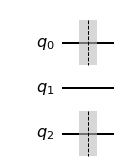

In [100]:
qc = QuantumCircuit(3)

# Method 1
qc.barrier(0, 2)
qc.draw()

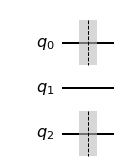

In [101]:
# Method 2
qc = QuantumCircuit(3)
qc.barrier([0, 2])
qc.draw()

In [102]:
from qiskit import qiskit

qiskit.__version__

'0.18.3'

In [103]:
qiskit.__qiskit_version__


/opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': '0.2.2', 'qiskit-finance': '0.2.1', 'qiskit-optimization': '0.2.3', 'qiskit-machine-learning': '0.2.1'}

In [4]:
import qiskit.tools.jupyter

qiskit_version_table # tabular format of Qiskit version information
qiskit_backend_overview # lists all available backends
qiskit_job_watcher # loads a Qiskit job watcher
qiskit_progress_bar # shows a Qiskit progress bar

Traceback (most recent call last):
  File "/tmp/ipykernel_60/853981625.py", line 3, in <module>
    qiskit_version_table # tabular format of Qiskit version information
NameError: name 'qiskit_version_table' is not defined

Use %tb to get the full traceback.


In [5]:
qiskit.__qiskit_version_table__

Traceback (most recent call last):
  File "/tmp/ipykernel_60/362018437.py", line 1, in <module>
    qiskit.__qiskit_version_table__
AttributeError: module 'qiskit' has no attribute '__qiskit_version_table__'

Use %tb to get the full traceback.


In [7]:
qiskit.qiskit_backend_overview

Traceback (most recent call last):
  File "/tmp/ipykernel_60/2502009314.py", line 1, in <module>
    qiskit.qiskit_backend_overview
AttributeError: module 'qiskit' has no attribute 'qiskit_backend_overview'

Use %tb to get the full traceback.


In [107]:
from qiskit import IBMQ
from qiskit import qiskit, execute, QuantumCircuit

# Start by loading your IBMQ API key.
IBMQ.enable_account('YOUR_API_KEY')

Traceback (most recent call last):
  File "/tmp/ipykernel_77/3925620982.py", line 5, in <module>
    IBMQ.enable_account('YOUR_API_KEY')
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py", line 93, in enable_account
    raise IBMQAccountError(
IBMQAccountError: 'An IBM Quantum Experience account is already in use for the session.'

Use %tb to get the full traceback.


In [108]:
# Retrieve a list of providers.
IBMQ.providers() # [<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

# Load the provider either by name or by group state.
provider = IBMQ.get_provider(hub='ibm-q')
provider = IBMQ.get_provider(group='open')

# Display the list of available backends.
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [109]:
# Filter by actual quantum computers that are operational.
provider.backends(simulator=False, operational=True)

# Filter by an advanced query.
provider.backends(filters=lambda x: x.configuration().n_qubits >= 10 and not x.configuration().simulator and x.status().operational==True)

# Select the first backend.
backend = provider.backends()[1] # <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

# Print version information about the backend.
backend.name() # ibmqx2
backend.version # 1
backend.provider() # <AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [111]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

job = execute(qc, backend)
job.status() # <JobStatus.RUNNING: 'job is actively running'>
job.status() # <JobStatus.DONE: 'job has successfully run'>
job.result().get_counts()

Traceback (most recent call last):
  File "/tmp/ipykernel_77/3684986182.py", line 7, in <module>
    job = execute(qc, backend)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/execute_function.py", line 294, in execute
    experiments = transpile(
  File "/opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py", line 290, in transpile
    _check_circuits_coupling_map(circuits, transpile_args, backend)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py", line 330, in _check_circuits_coupling_map
    raise TranspilerError(
TranspilerError: 'Number of qubits (2) in circuit-826 is greater than maximum (1) in the coupling_map'

Use %tb to get the full traceback.


In [112]:
from qiskit.tools import job_monitor

backend2 = qiskit.BasicAer.get_backend('qasm_simulator')
backend2.name() # qasm_simulator
backend2.version # 1
backend2.provider().backends() # [<QasmSimulatorPy('qasm_simulator')>, <StatevectorSimulatorPy('statevector_simulator')>, <UnitarySimulatorPy('unitary_simulator')>]

job = qiskit.execute(qc, backend2)

job_monitor(job) # Problem status of the running job
# Job Status: job has successfully run

job.status()
# <JobStatus.DONE: 'job has successfully run'>

job.result().get_counts()

Job Status: job has successfully run


{'11': 547, '00': 477}